# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libraries.

In this course, we've provided some code that loads the OpenAI API key for you. If you haven't install pip install openai. Set your OpenAI API Key which is a secret key. You can get one of these API keys from the OpenAI website. Set your API key like this: openai.api_key="sk-..."

In [1]:
import openai
#this part under here is only for the course don't look at it
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

#### helper function
Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat). 

This helper function will make it easier to use prompts and look at the generated outputs:

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Prompting Principles
- **Principle 1: Write clear and specific instructions**

REMEMBER clear doesn't mean short. longer prompts actually provide more clarity and context for the model, which can actually lead to more detailed and relevant outputs.

- **Principle 2: Give the model time to “think”**

## Principle 1: Write clear and specific instructions

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [ ]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
# make it clear to the model that this is a separate section,
# in this case Triple backtick
response = get_completion(prompt)
print(response)

#### Avoid prompt injections
Prompt injection : if a user is allowed to add some input into your prompt, they might give kind of conflicting instructions to 
the model that might kind of make it follow 
the user's instructions rather than doing what you wanted 
it to do.

*OUTPUT*

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which can be achieved through longer prompts that offer more clarity and context.

#### Tactic 2: Ask for a structured output
    
- JSON, HTML

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

*OUTPUT*
```json
{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}
```
We have three fictitious book titles formatted in this nice JSON structured output.
The thing that's nice about this is you could actually just in Python read this into a dictionary or into a list.

#### Tactic 3: Ask the model to check whether conditions are satisfied

So, if the task makes assumptions that aren't 
necessarily satisfied, then we can tell the model to check these assumptions 
first. And then if they're not satisfied, indicate this 
and kind of stop short of a full 
task completion attempt.

In [ ]:
# example steps to make a cop of tea
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

*OUTPUT*

Completion for Text 1:

Step 1 - Get some water boiling.

Step 2 - Grab a cup and put a tea bag in it.

Step 3 - Once the water is hot enough, pour it over the tea bag.

Step 4 - Let it sit for a bit so the tea can steep.

Step 5 - After a few minutes, take out the tea bag.

Step 6 - If you like, add some sugar or milk to taste.

Step 7 - Enjoy your delicious cup of tea.

In [ ]:
# example that describes a sunny day
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

*OUTPUT*

Completion for Text 2:
No steps provided.

the model determined that there were no instructions in the second 
paragraph

#### Tactic 4: "Few-shot" prompting
this is just providing examples of successful executions 
of the task you want performed before asking 
the model to do the actual task you want it to do.

In [ ]:
# told the model to answer in a consistent tone

prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

< grandparent>: Resilience is like a mighty oak tree that withstands the strongest storms, bending but never breaking. It is the unwavering determination to rise again after every fall, and the ability to find strength in the face of adversity. Just as a diamond is formed under immense pressure, resilience is forged through challenges and hardships, making us stronger and more resilient in the process.

## Principle 2: Give the model time to “think”

If a model is making reasoning errors by 
rushing to an incorrect conclusion, you should try reframing the query 
to request a chain or series of relevant reasoning 
before the model provides its final answer. Another way to think about 
this is that if you give a model a task that's 
too complex for it to do in a short amount 
of time or in a small number of words, it 
may make up a guess which is likely to be incorrect. And 
you know, this would happen for a person too. If 
you ask someone to complete a complex math 
question without time to work out the answer first, they 
would also likely make a mistake. So, in these situations, you 
can instruct the model to think longer about a problem, which 
means it's spending more computational effort on 
the task.

#### Tactic 1: Specify the steps required to complete a task

In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

*OUTPUT*

Completion for prompt 1:

1 - Jack and Jill, siblings, go on a quest to fetch water from a hilltop well, but encounter misfortune when Jack trips on a stone and tumbles down the hill, with Jill following suit, yet they return home and remain undeterred in their adventurous spirits.

2 - Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi par Jill, pourtant ils rentrent chez eux et restent déterminés dans leur esprit d'aventure.

3 - Jack, Jill

4 - {
  "french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi par Jill, pourtant ils rentrent chez eux et restent déterminés dans leur esprit d'aventure.",
  "num_names": 2
}

#### Ask for output in a specified format

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)

*OUTPUT*

Completion for prompt 2:
Summary: Jack and Jill, siblings, go on a quest to fetch water from a hilltop well but encounter misfortune along the way. 
Translation: Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.

Names: Jack, Jill

Output JSON: 
```json
{"french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.", "num_names": 2}
```

we've used angled brackets as the delimiter instead of triple backticks. 

the model has used the format that we asked for

#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [ ]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

The student's solution is correct. They correctly identified the costs for land, solar panels, and maintenance, and calculated the total cost as a function of the number of square feet.

#### Note that the student's solution is actually not correct.

#### We can fix this by instructing the model to work out its own solution first.

In [ ]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

To calculate the total cost for the first year of operations, we need to add up the costs of land, solar panels, and maintenance.

Let x be the size of the installation in square feet.

Costs:
1. Land cost: 100 * x
2. Solar panel cost: 250 * x
3. Maintenance cost: 100,000 + 10 * x

Total cost: 100 * x + 250 * x + 100,000 + 10 * x = 360 * x + 100,000

Is the student's solution the same as the actual solution just calculated:
No

Student grade:
Incorrect

#### Own calculation first

## Model Limitations: Hallucinations

So, even though the language model has been exposed to 
a vast amount of knowledge during its training process, 
it has not perfectly memorized the information 
it's seen, and so, it doesn't know the boundary of 
its knowledge very well. This means that it might 
try to answer questions about obscure topics and can 
make things up that sound plausible but are not actually true. And 
we call these fabricated ideas hallucinations. 

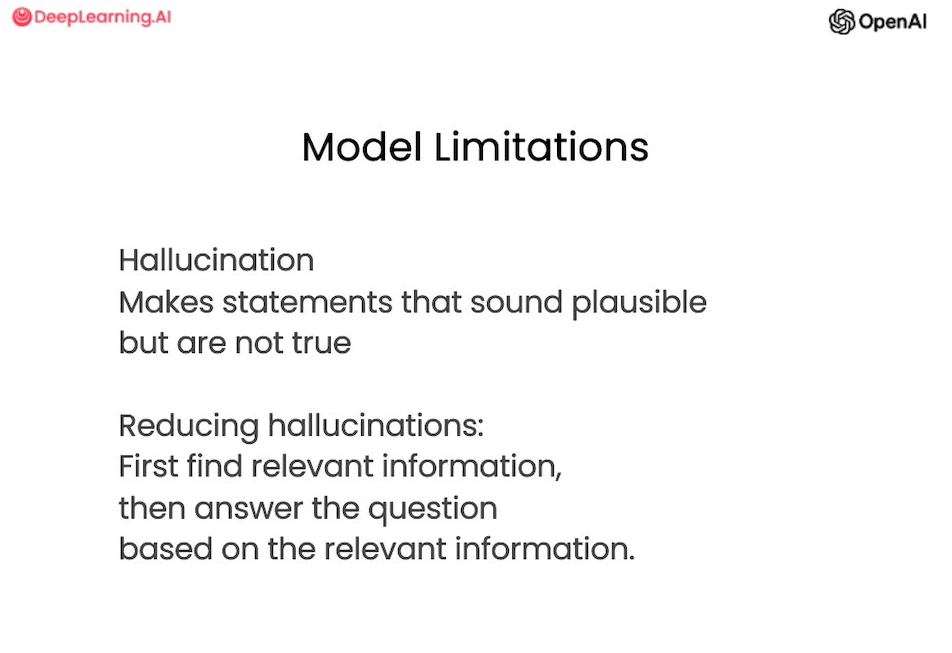

__Boie is a real company, the product name is not real.__

In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

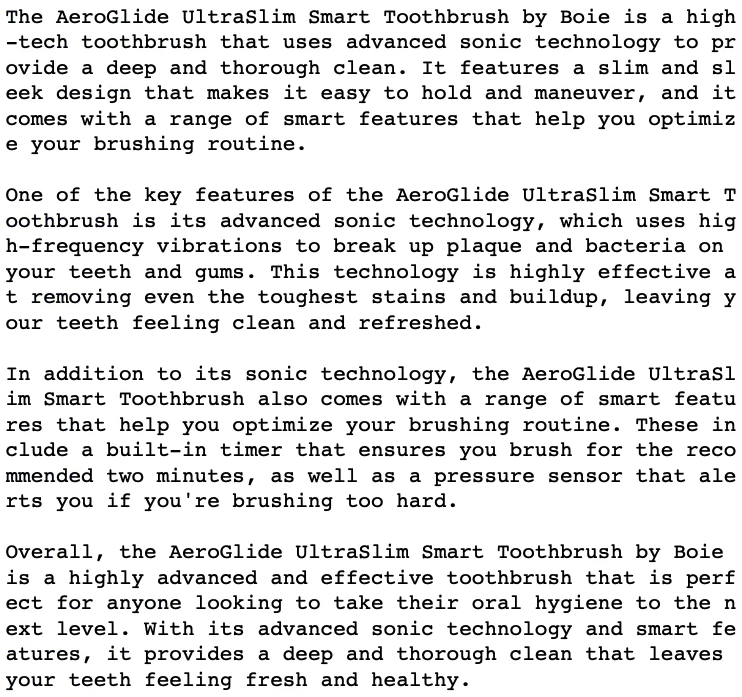

#### Reducing hallucinations:
First find relevant information, then answer the question based on the relevant information.

So if we run this, the model is going to give us a 
pretty realistic sounding description of a fictitious product. 
And the reason that this can be kind 
of dangerous is that this actually sounds pretty 
realistic. So, make sure to kind of use 
some of the techniques that we've gone through in this notebook 
to try and kind of avoid this when you're building 
your own applications. And this is, you know, a known 
weakness of the models and something that we're actively working 
on combating. And one additional tactic to reduce hallucinations, in the 
case that you want the model to kind of 
generate answers based on a text, is to ask 
the model to first find any relevant quotes from the text and 
then ask it to use those quotes to kind of answer questions. 
And kind of having a way to trace the answer back 
to the source document is often pretty helpful 
to kind of reduce these hallucinations.

#### Notes on using the OpenAI API outside of this classroom

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys). 

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."
```

#### A note about the backslash
- In the course, we are using a backslash `\` to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.